In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


In [ ]:
data = pd.read_excel("/content/Dataset_quiz 2.xlsx")

In [ ]:
data2 = pd.read_csv("/content/Dataset_Quiz 1.csv")

In [ ]:
data2.head()

,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,Depression Score,Anxiety Score,Stress Score
0,2,3,2,2,16,1,1,1,12,1,10,2,1,2,NaN,41,48,54
1,2,3,2,1,16,2,1,2,7,0,70,2,1,4,NaN,38,31,41
2,2,3,2,2,17,2,1,1,4,3,60,1,1,3,NaN,53,26,31
3,1,3,2,1,13,2,1,2,4,5,70,2,1,5,biology,30,31,30
4,3,2,2,2,19,2,2,3,10,1,10,2,1,4,Psychology,46,54,43


In [ ]:
data2.describe()

,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,Depression Score,Anxiety Score,Stress Score
count,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.00000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000
mean,2.503834,2.220264,1.789541,1.635852,23.612168,1.274519,1.200025,1.13516,7.555852,1.642992,31.312885,1.705795,1.159547,3.510270,35.060088,30.054758,35.153891
std,0.885414,0.804761,0.444180,0.483906,21.581722,0.446277,0.400024,0.40030,3.554395,1.351362,25.871272,0.473388,0.445882,2.141518,12.321566,10.249169,10.523291
min,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,1.000000,0.00000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,14.000000,14.000000,14.000000
25%,2.000000,2.000000,2.000000,1.000000,18.000000,1.000000,1.000000,1.00000,4.000000,1.000000,10.000000,1.000000,1.000000,2.000000,25.000000,22.000000,27.000000
50%,3.000000,2.000000,2.000000,2.000000,21.000000,1.000000,1.000000,1.00000,10.000000,1.000000,10.000000,2.000000,1.000000,3.000000,35.000000,29.000000,35.000000
75%,3.000000,3.000000,2.000000,2.000000,25.000000,2.000000,1.000000,1.00000,10.000000,2.000000,60.000000,2.000000,1.000000,4.000000,46.000000,37.000000,43.000000
max,4.000000,3.000000,3.000000,2.000000,1998.000000,2.000000,2.000000,3.00000,12.000000,5.000000,70.000000,2.000000,3.000000,133.000000,56.000000,56.000000,56.000000


In [ ]:
data.head()

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,...,VCL15,VCL16,Extraversion Score,Agreeableness Score,Conscientiousness Score,Emotional Stability Score,Openness to Experiences Score,Depression Score,Anxiety Score,Stress Score
0,1,5,7,7,7,7,7,5,1,1,...,1,1,1.0,5.0,5.0,1.0,7.0,41,48,54
1,6,5,4,7,5,4,7,7,1,5,...,1,1,5.0,5.0,2.5,1.0,4.0,38,31,41
2,2,5,2,2,5,6,5,5,3,2,...,1,1,2.0,4.0,2.5,4.5,5.5,53,26,31
3,1,1,7,4,6,4,6,1,6,1,...,1,1,2.5,6.5,7.0,5.0,6.5,30,31,30
4,2,5,3,6,5,5,5,6,3,3,...,1,1,2.5,4.0,2.5,2.5,5.0,46,54,43


In [ ]:
data.drop(["Unnamed: 0","major","country"],inplace=True,axis=1)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.columns

Index(['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8',
       'TIPI9', 'TIPI10', 'VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6',
       'VCL7', 'VCL8', 'VCL9', 'VCL10', 'VCL11', 'VCL12', 'VCL13', 'VCL14',
       'VCL15', 'VCL16', 'Extraversion Score', 'Agreeableness Score',
       'Conscientiousness Score', 'Emotional Stability Score',
       'Openness to Experiences Score', 'Depression Score', 'Anxiety Score',
       'Stress Score'],
      dtype='object')

In [ ]:
max(list(sorted(set(data['Depression Score']))))
# columns = ['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A','married', 'familysize', 'Anxiety Score',
#        'Stress Score', 'Extraversion Score', 'Agreeableness Score', 'Conscientiousness Score', 'Emotional Stability Score',
#        'Openness to Experiences Score']
# new_x = data[columns]
# new_y = data['Depression Score']

56

In [ ]:
def change_label(x):

  if x > 0 and x < 0.5: return 0
  elif x > 0.5 and x < 1.5: return 1
  elif x > 1.5 and x < 2.5: return 2
  elif x > 2.5 and x < 3.5: return 3
  elif x > 3.5 and x < 4.5: return 4
  elif x > 4.5 and x < 5.5: return 5
  elif x > 5.5 and x < 6.5: return 6
  else: return 7

data['Openness to Experiences Score'] = data['Openness to Experiences Score'].map(lambda x: change_label(x)) 

In [ ]:
# data['Openness to Experiences Score'].head(50)

In [ ]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(
		max_trials=4, 		# Number of Iterations
		min_samples=3, 		# Minimum size of the sample
		loss='absolute_loss', 	# Metrics for loss
		residual_threshold=10 	# Threshold
		)

In [ ]:
x = data.iloc[:,10:-3]

In [ ]:
x.head()

,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,...,VCL12,VCL13,VCL14,VCL15,VCL16,Extraversion Score,Agreeableness Score,Conscientiousness Score,Emotional Stability Score,Openness to Experiences Score
0,1,0,0,1,1,0,1,0,0,1,...,0,0,1,1,1,1.0,5.0,5.0,1.0,7.0
1,1,1,0,1,1,0,0,0,0,1,...,0,0,1,1,1,5.0,5.0,2.5,1.0,4.0
2,1,0,0,1,1,0,0,0,0,0,...,0,0,1,1,1,2.0,4.0,2.5,4.5,5.5
3,1,0,0,1,1,0,0,0,0,1,...,0,0,1,1,1,2.5,6.5,7.0,5.0,6.5
4,1,1,0,1,1,0,0,1,0,1,...,0,1,1,1,1,2.5,4.0,2.5,2.5,5.0


In [ ]:
y = data.iloc[:,-3]

In [ ]:
y.head()

0    41
1    38
2    53
3    30
4    46
Name: Depression Score, dtype: int64

In [ ]:
x = x.values
y = y.values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(31820, 21)
(7955, 21)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(31820,)
(7955,)


In [ ]:
# data.info

In [ ]:
ransac.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ransac.py:358: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  FutureWarning,


RANSACRegressor(loss='absolute_loss', max_trials=4, min_samples=3,
                residual_threshold=10)

In [ ]:
pred=ransac.predict(x_test)

In [ ]:
pred

array([36.02564869, 28.32068051, 37.24306079, ..., 29.41417516,
       32.32609317, 37.27713478])

In [ ]:
y_test

33099    25
30943    27
22923    33
3607     42
14589    22
         ..
27245    55
37948    15
168      15
26262    33
17395    47
Name: Depression Score, Length: 7955, dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_test,pred)

9.018990151185863

In [ ]:
mean_squared_error(y_test,pred)

121.79004768690743

In [ ]:
r2_score(y_test, pred, multioutput='variance_weighted')

0.19471974309371898

In [ ]:
std = StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

### RANDOM **FOREST**

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
pred = rf.predict(x_test)

In [ ]:
def evaluation_matrix(x_test, pred):
  print("classification_report: ", classification_report(x_test, pred))
  print('*' * 125)
  print()
  print("Accuracy Score: ", accuracy_score(x_test, pred))
  print("*" * 125)
  print()
  print("Confusion_matrix: ")
  plt.figure(figsize=(10, 5))
  sns.heatmap(confusion_matrix(x_test, pred), annot=True, fmt='d')

classification_report:                precision    recall  f1-score   support

          14       0.18      0.28      0.22       179
          15       0.09      0.11      0.10       158
          16       0.05      0.07      0.06       184
          17       0.04      0.04      0.04       181
          18       0.02      0.02      0.02       164
          19       0.04      0.04      0.04       166
          20       0.03      0.03      0.03       186
          21       0.03      0.03      0.03       199
          22       0.03      0.03      0.03       182
          23       0.04      0.04      0.04       196
          24       0.03      0.03      0.03       165
          25       0.02      0.02      0.02       182
          26       0.04      0.04      0.04       201
          27       0.03      0.04      0.03       190
          28       0.02      0.02      0.02       206
          29       0.05      0.05      0.05       228
          30       0.04      0.03      0.03       214
   

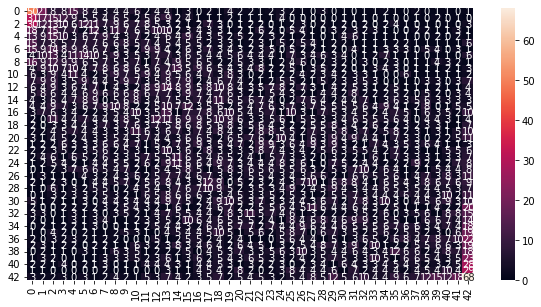

In [ ]:
evaluation_matrix(y_test, pred)

## LOGISTIC **REGRESSION**

In [ ]:
lg = LogisticRegression()
lg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
lg_pred = lg.predict(x_test)

classification_report:                precision    recall  f1-score   support

          14       0.17      0.51      0.25       179
          15       0.10      0.11      0.11       158
          16       0.06      0.14      0.09       184
          17       0.05      0.03      0.04       181
          18       0.05      0.06      0.05       164
          19       0.04      0.04      0.04       166
          20       0.05      0.01      0.02       186
          21       0.05      0.04      0.04       199
          22       0.04      0.03      0.03       182
          23       0.05      0.02      0.02       196
          24       0.03      0.04      0.03       165
          25       0.00      0.00      0.00       182
          26       0.04      0.03      0.04       201
          27       0.03      0.05      0.04       190
          28       0.04      0.10      0.06       206
          29       0.09      0.05      0.07       228
          30       0.04      0.03      0.04       214
   

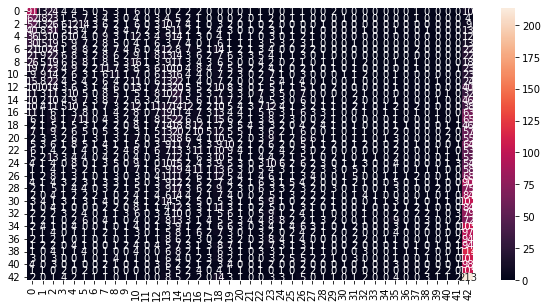

In [ ]:
evaluation_matrix(y_test, lg_pred)

### **DECISION TREE**

In [ ]:
dcs = tree.DecisionTreeClassifier()
dcs.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dcs_pred = dcs.predict(x_test)

classification_report:                precision    recall  f1-score   support

          14       0.18      0.28      0.22       179
          15       0.09      0.11      0.10       158
          16       0.05      0.07      0.06       184
          17       0.04      0.04      0.04       181
          18       0.02      0.02      0.02       164
          19       0.04      0.04      0.04       166
          20       0.03      0.03      0.03       186
          21       0.03      0.03      0.03       199
          22       0.03      0.03      0.03       182
          23       0.04      0.04      0.04       196
          24       0.03      0.03      0.03       165
          25       0.02      0.02      0.02       182
          26       0.04      0.04      0.04       201
          27       0.03      0.04      0.03       190
          28       0.02      0.02      0.02       206
          29       0.05      0.05      0.05       228
          30       0.04      0.03      0.03       214
   

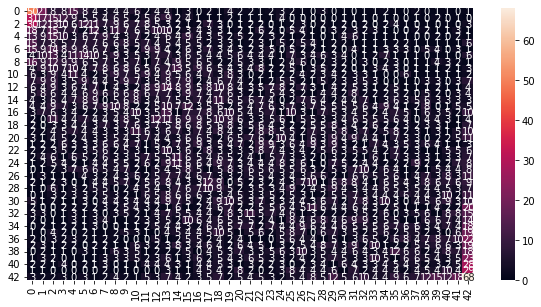

In [ ]:
evaluation_matrix(y_test,pred)

GAUSSIAN NB


In [ ]:
gb = GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [ ]:
gb_pred=gb.predict(x_test)

classification_report:                precision    recall  f1-score   support

          14       0.18      0.28      0.22       179
          15       0.09      0.11      0.10       158
          16       0.05      0.07      0.06       184
          17       0.04      0.04      0.04       181
          18       0.02      0.02      0.02       164
          19       0.04      0.04      0.04       166
          20       0.03      0.03      0.03       186
          21       0.03      0.03      0.03       199
          22       0.03      0.03      0.03       182
          23       0.04      0.04      0.04       196
          24       0.03      0.03      0.03       165
          25       0.02      0.02      0.02       182
          26       0.04      0.04      0.04       201
          27       0.03      0.04      0.03       190
          28       0.02      0.02      0.02       206
          29       0.05      0.05      0.05       228
          30       0.04      0.03      0.03       214
   

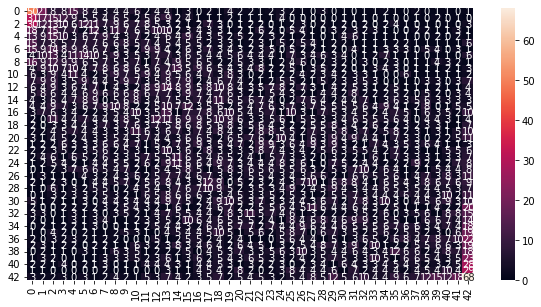

In [ ]:
evaluation_matrix(y_test,pred)

### **SVM**

In [ ]:
svs = svm.SVC()
svs.fit(x_train,y_train)

SVC()

In [ ]:
svs_pred = svs.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report:                precision    recall  f1-score   support

           1       1.00      0.20      0.33        76
           2       0.00      0.00      0.00       182
           3       1.00      0.00      0.00       492
           4       0.82      0.05      0.10      1233
           5       1.00      0.03      0.05      1039
           6       1.00      0.01      0.02       761
           7       0.53      1.00      0.69      4172

    accuracy                           0.54      7955
   macro avg       0.76      0.18      0.17      7955
weighted avg       0.70      0.54      0.39      7955

*****************************************************************************************************************************

Accuracy Score:  0.5367693274670019
*****************************************************************************************************************************

Confusion_matrix: 


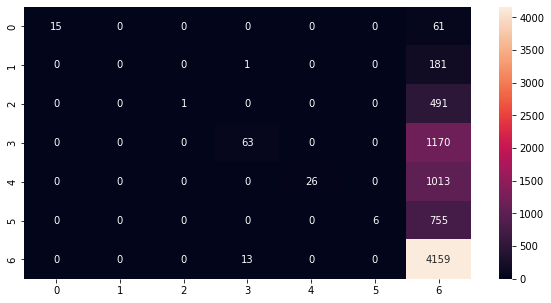

In [ ]:
evaluation_matrix(y_test,pred)

### **ADABOOST**

In [ ]:
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)

AdaBoostClassifier()

In [ ]:
abc_pred = abc.predict(x_test)

classification_report:                precision    recall  f1-score   support

          14       0.19      0.31      0.23       179
          15       0.08      0.12      0.10       158
          16       0.08      0.12      0.10       184
          17       0.05      0.06      0.05       181
          18       0.03      0.04      0.03       164
          19       0.05      0.05      0.05       166
          20       0.05      0.05      0.05       186
          21       0.04      0.03      0.03       199
          22       0.02      0.02      0.02       182
          23       0.03      0.03      0.03       196
          24       0.02      0.02      0.02       165
          25       0.01      0.01      0.01       182
          26       0.03      0.02      0.03       201
          27       0.03      0.03      0.03       190
          28       0.04      0.06      0.05       206
          29       0.05      0.04      0.05       228
          30       0.02      0.02      0.02       214
   

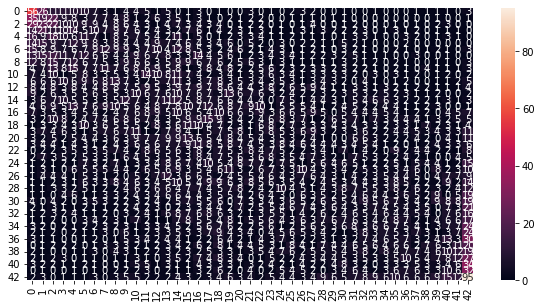

In [ ]:
evaluation_matrix(y_test,pred)

### **XG BOOST**

In [ ]:
xg = XGBClassifier()
xg.fit(x_train,y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
xg_pred = xg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report:                precision    recall  f1-score   support

           1       1.00      0.20      0.33        76
           2       0.00      0.00      0.00       182
           3       1.00      0.00      0.00       492
           4       0.82      0.05      0.10      1233
           5       1.00      0.03      0.05      1039
           6       1.00      0.01      0.02       761
           7       0.53      1.00      0.69      4172

    accuracy                           0.54      7955
   macro avg       0.76      0.18      0.17      7955
weighted avg       0.70      0.54      0.39      7955

*****************************************************************************************************************************

Accuracy Score:  0.5367693274670019
*****************************************************************************************************************************

Confusion_matrix: 


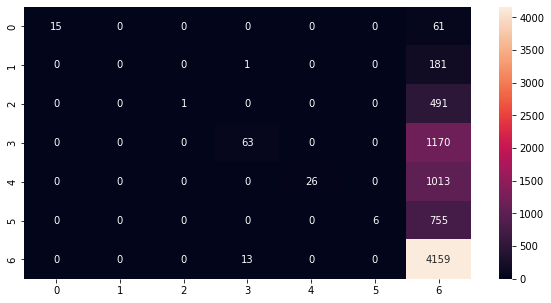

In [ ]:
evaluation_matrix(y_test,pred)